# **5. House Price Predictor Notebook**

## Objectives

* Develop a working model for the House Price Predictor based on the cleaned and feature engineered dataset

## Inputs

* The cleaned TrainSetCleaned, tested with TestSetClean. Path: /workspace/milestone-project-housing-issues/outputs/datasets/cleaned/TrainSetCleaned.csv

## Outputs

* A working model for the House Price predictor

## Additional Comments

* As per the business case, the required performance for the model is an R2 value of at least 0.75 for both train and test set


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [267]:
import os

# Get the current directory
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Change the directory to the new path
os.chdir('/workspace/milestone-project-housing-issues')

# Get the updated current directory
current_dir = os.getcwd()
print("New Current Directory:", current_dir)

Current Directory: /workspace/milestone-project-housing-issues
New Current Directory: /workspace/milestone-project-housing-issues


In [268]:
# Loading dataset HousePricesClean from /workspace/milestone-project-housing-issues/outputs/datasets/cleaned/HousePricesClean.csv

import pandas as pd
df_houseprices_allvars = pd.read_csv(f"/workspace/milestone-project-housing-issues/outputs/datasets/collection/HousePricesClean.csv")
print(df_houseprices_allvars.shape)
df_houseprices_allvars.head()

(1460, 21)


,1stFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinType1,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,...,OverallQual,TotalBsmtSF,YearBuilt,SalePrice,Has2ndFloor,HasMasVnr,HasOpenPorch,HasGarage,HasFinBsmt,ModsMade
0,856,3,No,GLQ,RFn,2003,1710,Gd,8450,65,...,7,856,2003,208500,1,1,1,1,1,0
1,1262,3,Gd,ALQ,RFn,1976,1262,TA,9600,80,...,6,1262,1976,181500,0,0,0,1,1,0
2,920,3,Mn,GLQ,RFn,2001,1786,Gd,11250,68,...,7,920,2001,223500,1,1,1,1,1,1
3,961,2,No,ALQ,Unf,1998,1717,Gd,9550,60,...,7,756,1915,140000,0,0,1,1,1,1
4,1145,4,Av,GLQ,RFn,2000,2198,Gd,14260,84,...,8,1145,2000,250000,0,1,1,1,1,0


In [269]:
df_houseprices_allvars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   1stFlrSF      1460 non-null   int64 
 1   BedroomAbvGr  1460 non-null   int64 
 2   BsmtExposure  1460 non-null   object
 3   BsmtFinType1  1460 non-null   object
 4   GarageFinish  1460 non-null   object
 5   GarageYrBlt   1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   KitchenQual   1460 non-null   object
 8   LotArea       1460 non-null   int64 
 9   LotFrontage   1460 non-null   int64 
 10  OverallCond   1460 non-null   int64 
 11  OverallQual   1460 non-null   int64 
 12  TotalBsmtSF   1460 non-null   int64 
 13  YearBuilt     1460 non-null   int64 
 14  SalePrice     1460 non-null   int64 
 15  Has2ndFloor   1460 non-null   int64 
 16  HasMasVnr     1460 non-null   int64 
 17  HasOpenPorch  1460 non-null   int64 
 18  HasGarage     1460 non-null   int64 
 19  HasFin

In [270]:
missing_values_count = df_houseprices_allvars.isna().sum()
missing_values_count

1stFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinType1    0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
SalePrice       0
Has2ndFloor     0
HasMasVnr       0
HasOpenPorch    0
HasGarage       0
HasFinBsmt      0
ModsMade        0
dtype: int64

In [271]:
# Explore dataset
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df_houseprices_allvars, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Recode target variable (SalePrice) to categorical SalePriceBand

In [272]:
# Defining min and max values
min_price = df_houseprices_allvars['SalePrice'].min()
max_price = df_houseprices_allvars['SalePrice'].max()

# Calculating band widths
bin_width = (max_price - min_price) / 4

# Defining bin edges
bins = [min_price + i * bin_width for i in range(5)]

# Using pd.cut to create bands and label them with numeric values
df_houseprices_allvars['SalePriceBand'] = pd.cut(df_houseprices_allvars['SalePrice'], bins=bins, labels=range(4), include_lowest=True)


print(df_houseprices_allvars[['SalePrice', 'SalePriceBand']].head())

   SalePrice SalePriceBand
0     208500             0
1     181500             0
2     223500             1
3     140000             0
4     250000             1


In [273]:
# Checking bands produced by recode
print("Bin edges for SalePriceBand:", bins)

Bin edges for SalePriceBand: [34900.0, 214925.0, 394950.0, 574975.0, 755000.0]


In [274]:
# Drop variable SalePrice as too many unique values to be useful, replaced by SalePriceBand

df_houseprices_allvars.drop('SalePrice', axis=1, inplace=True)

In [275]:
# Recode 'OverallCond' and 'OverallQual' to categorical variables
df_houseprices_allvars['OverallCond'] = df_houseprices_allvars['OverallCond'].astype('object')
df_houseprices_allvars['OverallQual'] = df_houseprices_allvars['OverallQual'].astype('object')

In [276]:
# Recode SalePriceBand from category into object for consistency
df_houseprices_allvars['SalePriceBand'] = df_houseprices_allvars['SalePriceBand'].astype('object')

In [277]:
df_houseprices_allvars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   1stFlrSF       1460 non-null   int64 
 1   BedroomAbvGr   1460 non-null   int64 
 2   BsmtExposure   1460 non-null   object
 3   BsmtFinType1   1460 non-null   object
 4   GarageFinish   1460 non-null   object
 5   GarageYrBlt    1460 non-null   int64 
 6   GrLivArea      1460 non-null   int64 
 7   KitchenQual    1460 non-null   object
 8   LotArea        1460 non-null   int64 
 9   LotFrontage    1460 non-null   int64 
 10  OverallCond    1460 non-null   object
 11  OverallQual    1460 non-null   object
 12  TotalBsmtSF    1460 non-null   int64 
 13  YearBuilt      1460 non-null   int64 
 14  Has2ndFloor    1460 non-null   int64 
 15  HasMasVnr      1460 non-null   int64 
 16  HasOpenPorch   1460 non-null   int64 
 17  HasGarage      1460 non-null   int64 
 18  HasFinBsmt     1460 non-null

---

# Prepare Modelling Stage with Original Dataset

## ML Pipeline with combined data from TrainSetCleaned and TestSetCleaned

* Variables have been combined to add binary variables created in the DataCleaning notebook, alongside the original variables
* The amended target variables (SalePriceBand) has also been retained

In [278]:
from sklearn.pipeline import Pipeline

# Feature Engineering
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.encoding import OrdinalEncoder


def PipelineDataCleaningAndFeatureEngineering():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['BsmtExposure','BsmtFinType1', 'GarageFinish',
                                                                'KitchenQual', 'OverallCond', 'OverallQual'])),

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

    ])

    return pipeline_base


PipelineDataCleaningAndFeatureEngineering()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['BsmtExposure', 'BsmtFinType1',
                                           'GarageFinish', 'KitchenQual',
                                           'OverallCond', 'OverallQual'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6))])

## ML Pipeline for Modelling and Hyperparameter Optimisation

In [279]:
# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


def PipelineClf(model):
    pipeline_base = Pipeline([
        ("scaler", StandardScaler()),
        ("feat_selection", SelectFromModel(model)),
        ("model", model),
    ])

    return pipeline_base

#### Custom Class for Hyperparameter Optimisation

In [280]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")

            model = PipelineClf(self.models[key])
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, )
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        return df[columns], self.grid_searches

## Split Train and Test Set

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_houseprices_allvars.drop(['SalePriceBand'], axis=1),
    df_houseprices_allvars['SalePriceBand'],
    test_size=0.2,
    random_state=0,
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1168, 20) (1168,) (292, 20) (292,)


## Target Imbalance

In [282]:
pipeline_data_cleaning_feat_eng = PipelineDataCleaningAndFeatureEngineering()
X_train = pipeline_data_cleaning_feat_eng.fit_transform(X_train)
X_test = pipeline_data_cleaning_feat_eng.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1168, 18) (1168,) (292, 18) (292,)


/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]


#### Check Train Set Target distribution

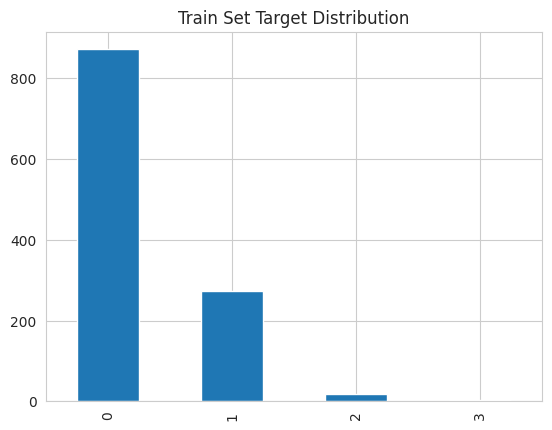

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
y_train.value_counts().sort_index().plot(kind='bar', title='Train Set Target Distribution')
plt.show()

#### Use SMOTE to balance Train Set target

In [285]:
# Checking value distribution before applying SMOTE
y_train.value_counts()

0    872
1    273
2     19
3      4
Name: SalePriceBand, dtype: int64

In [286]:
# Applying LabelEncoder to set labels in y_train for SMOTE
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [287]:
# Applying SMOTE with k-neighbors set to 3 to accout for imbalance and small size of highest SalePriceBand

from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='minority', random_state=0, k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2036, 18) (2036,) (292, 18) (292,)


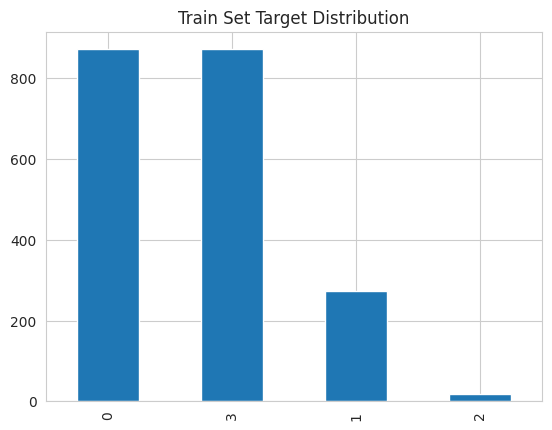

In [288]:
import matplotlib.pyplot as plt
y_train = pd.Series(y_train)
y_train.value_counts().plot(kind='bar', title='Train Set Target Distribution')
plt.show()

In [324]:
# Checking value distribution after applying SMOTE
y_train.value_counts()

0    872
3    872
1    273
2     19
Name: SalePriceBand, dtype: int64

---

## Use Grid Search CV -Sklearn to find most suitable algorithm

In [289]:
models_quick_search = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "XGBClassifier": XGBClassifier(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=0),
}

params_quick_search = {
    "LogisticRegression": {},
    "XGBClassifier": {},
    "DecisionTreeClassifier": {},
    "RandomForestClassifier": {},
    "GradientBoostingClassifier": {},
    "ExtraTreesClassifier": {},
    "AdaBoostClassifier": {},
}

In [290]:
from sklearn.metrics import make_scorer, recall_score
search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train,
           scoring =  make_scorer(recall_score, average='micro'),
           n_jobs=-1, cv=5)


Running GridSearchCV for LogisticRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.In


Running GridSearchCV for DecisionTreeClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [291]:
import numpy as np
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
3,RandomForestClassifier,0.933661,0.942042,0.948403,0.004824
1,XGBClassifier,0.918919,0.934178,0.948529,0.01325
0,LogisticRegression,0.916667,0.927314,0.938575,0.007328
5,ExtraTreesClassifier,0.914005,0.92289,0.931204,0.006307
4,GradientBoostingClassifier,0.896806,0.917959,0.953431,0.02177
6,AdaBoostClassifier,0.862408,0.902255,0.931204,0.022451
2,DecisionTreeClassifier,0.889435,0.901274,0.92629,0.013952


### Search for best hyperparameter configuration

In [292]:
from sklearn.ensemble import RandomForestClassifier

# Define the model search dictionary
models_search = {
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
}

# Define the hyperparameter grid for RandomForestClassifier
params_search = {
    "RandomForestClassifier": {
        'model__n_estimators': [100, 200, 500],  # Number of trees
        'model__max_depth': [3, 10, None],  # Maximum depth of the tree
        'model__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
        'model__min_samples_leaf': [1, 2, 4],  # Minimum samples required to be a leaf node
        'model__bootstrap': [True, False],  # Whether bootstrap samples are used
    }
}

In [293]:
from sklearn.metrics import recall_score, make_scorer
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring =  make_scorer(recall_score, average='micro'),
           n_jobs=-1, cv=5)


Running GridSearchCV for RandomForestClassifier 

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [294]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__bootstrap,model__max_depth,model__min_samples_leaf,model__min_samples_split,model__n_estimators
61,RandomForestClassifier,0.943489,0.948428,0.958231,0.005154,True,None,1,10,200
70,RandomForestClassifier,0.945946,0.947938,0.955774,0.003918,True,None,2,10,200
33,RandomForestClassifier,0.941032,0.947937,0.958231,0.005691,True,10,1,10,100
116,RandomForestClassifier,0.938575,0.946956,0.95086,0.005041,False,10,1,10,500
42,RandomForestClassifier,0.941032,0.946955,0.958231,0.005933,True,10,2,10,100
...,...,...,...,...,...,...,...,...,...,...
19,RandomForestClassifier,0.916462,0.925838,0.931204,0.006625,True,3,4,2,200
22,RandomForestClassifier,0.916462,0.925838,0.931204,0.006625,True,3,4,5,200
13,RandomForestClassifier,0.914005,0.925838,0.933661,0.007797,True,3,2,5,200
25,RandomForestClassifier,0.916462,0.925838,0.931204,0.006625,True,3,4,10,200


In [295]:
# Getting the best model name

best_model = grid_search_summary.iloc[0,0]
best_model

'RandomForestClassifier'

In [296]:
# Best parameters for model

best_parameters = grid_search_pipelines[best_model].best_params_
best_parameters

{'model__bootstrap': True,
 'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 10,
 'model__n_estimators': 200}

#### Define the best clf pipeline

In [297]:
pipeline_clf = grid_search_pipelines[best_model].best_estimator_
pipeline_clf

Pipeline(steps=[('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=0))),
                ('model',
                 RandomForestClassifier(min_samples_split=10, n_estimators=200,
                                        random_state=0))])

## Assess feature importance

In [298]:
X_train.head(3)

,BedroomAbvGr,BsmtExposure,BsmtFinType1,GarageFinish,GrLivArea,KitchenQual,LotArea,LotFrontage,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,Has2ndFloor,HasMasVnr,HasOpenPorch,HasGarage,HasFinBsmt,ModsMade
0,3,0,0,0,1828,0,11694,90,0,0,1822,2007,0,1,1,1,1,0
1,2,1,1,1,894,1,6600,60,0,1,894,1962,0,0,0,1,0,0
2,2,1,2,0,964,1,13360,80,1,1,876,1921,0,0,0,1,1,1


* These are the 5 most important features in descending order. The model was trained on them: 
['TotalBsmtSF', 'GrLivArea', 'LotFrontage', 'LotArea', 'YearBuilt']


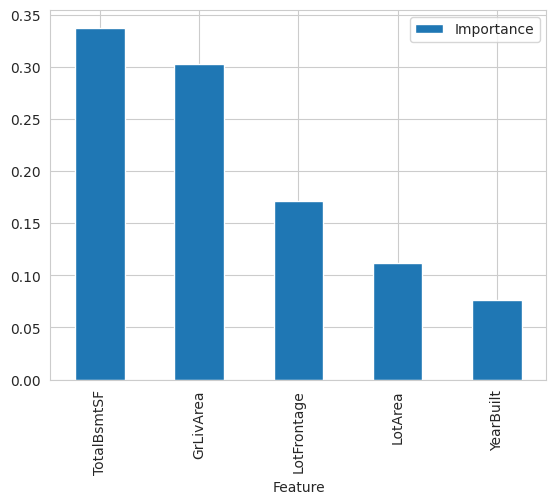

In [299]:
# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    'Feature': X_train.columns[pipeline_clf['feat_selection'].get_support()],
    'Importance': pipeline_clf['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)

# re-assign best_features order
best_features = df_feature_importance['Feature'].to_list()

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

## Evaluate Pipeline on Train and Test Sets

In [300]:
from sklearn.preprocessing import LabelEncoder

# Encode y_train and y_test consistently
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [301]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def confusion_matrix_and_report(X, y, pipeline, label_map):
    prediction = pipeline.predict(X)

    print('---  Confusion Matrix  ---')
    labels_as_str = [str(sub) for sub in label_map]
    
    print(pd.DataFrame(confusion_matrix(y_true=y, y_pred=prediction),
                      columns=[["Actual " + sub for sub in labels_as_str]],
                      index=[["Prediction " + sub for sub in labels_as_str]]))
    print("\n")

    print('---  Classification Report  ---')
    print(classification_report(y, prediction, target_names=labels_as_str), "\n")

def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)

    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)

In [302]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0 1 2 3]
Unique values in y_test: [0 1 2 3]


In [303]:
clf_performance(X_train=X_train, y_train=y_train_encoded,
                X_test=X_test, y_test=y_test_encoded,
                pipeline=pipeline_clf,
                label_map=[0, 1, 2, 3])

#### Train Set #### 

---  Confusion Matrix  ---
             Actual 0 Actual 1 Actual 2 Actual 3
Prediction 0      856       16        0        0
Prediction 1       18      255        0        0
Prediction 2        0        6       12        1
Prediction 3        0        0        0      872


---  Classification Report  ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       872
           1       0.92      0.93      0.93       273
           2       1.00      0.63      0.77        19
           3       1.00      1.00      1.00       872

    accuracy                           0.98      2036
   macro avg       0.97      0.89      0.92      2036
weighted avg       0.98      0.98      0.98      2036
 

#### Test Set ####

---  Confusion Matrix  ---
             Actual 0 Actual 1 Actual 2 Actual 3
Prediction 0      211       17        0        0
Prediction 1       13       41        2        1
Prediction 2        0        3        2  

## Refit pipeline with best features

In [304]:
best_features

['TotalBsmtSF', 'GrLivArea', 'LotFrontage', 'LotArea', 'YearBuilt']

In [305]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

def PipelineDataCleaningAndFeatureEngineering():
    # Define the list of numerical columns to be transformed
    numerical_columns = ['TotalBsmtSF', 'GrLivArea', 'LotFrontage', 'LotArea', 'YearBuilt']

    # Create a Pipeline to first impute, then scale
    numerical_pipeline = Pipeline([
        ("NumericalImputer", SimpleImputer(strategy='mean')),  # Step 1: Imputation
        ("NumericalScaler", StandardScaler())  # Step 2: Scaling
    ])

    # Apply the numerical pipeline only once to the numerical columns
    transformer = ColumnTransformer([
        ("numerical", numerical_pipeline, numerical_columns)
    ])

    # Create a final pipeline with the column transformer
    pipeline_base = Pipeline([
        ("transformer", transformer)
    ])

    return pipeline_base

### Rewrite ML Pipeline for Modelling

In [306]:
# Pipeline Optmization: Model
def PipelineClf(model):
    pipeline_base = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model),
    ])

    return pipeline_base

#### Split Train Test Set, with best features

In [307]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_houseprices_allvars.drop(['SalePriceBand'], axis=1),
    df_houseprices_allvars['SalePriceBand'],
    test_size=0.2,
    random_state=0,
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1168, 20) (1168,) (292, 20) (292,)


In [308]:
# Filter only the most important variables

X_train = X_train.filter(best_features)
X_test = X_test.filter(best_features)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.head(3)

(1168, 5) (1168,) (292, 5) (292,)


,TotalBsmtSF,GrLivArea,LotFrontage,LotArea,YearBuilt
618,1822,1828,90,11694,2007
870,894,894,60,6600,1962
92,876,964,80,13360,1921


#### Target imbalance

In [309]:
pipeline_data_cleaning_feat_eng = PipelineDataCleaningAndFeatureEngineering()

# Apply the pipeline to your training and testing data
X_train_transformed = pipeline_data_cleaning_feat_eng.fit_transform(X_train)
X_test_transformed = pipeline_data_cleaning_feat_eng.transform(X_test)

# Check the shapes after transformation
print(X_train_transformed.shape, y_train.shape, X_test_transformed.shape, y_test.shape)

(1168, 5) (1168,) (292, 5) (292,)


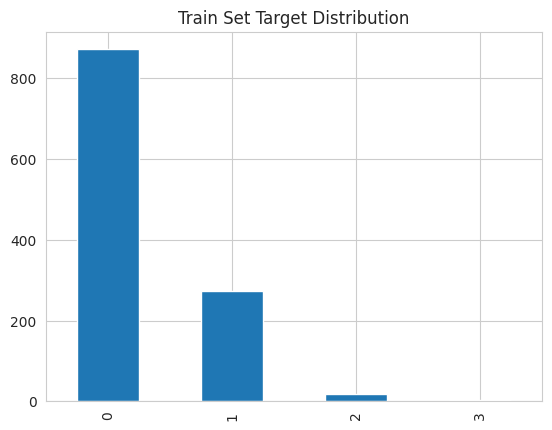

In [310]:
# Check train set target distribution

import matplotlib.pyplot as plt
y_train.value_counts().plot(kind='bar', title='Train Set Target Distribution')
plt.show()

In [311]:
# Recode target to string values
y_train = y_train.astype(str)

In [312]:
# Applying SMOTE with k-neighbors set to 3 to accout for imbalance and small size of highest SalePriceBand

from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='minority', random_state=0, k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2036, 5) (2036,) (292, 5) (292,)


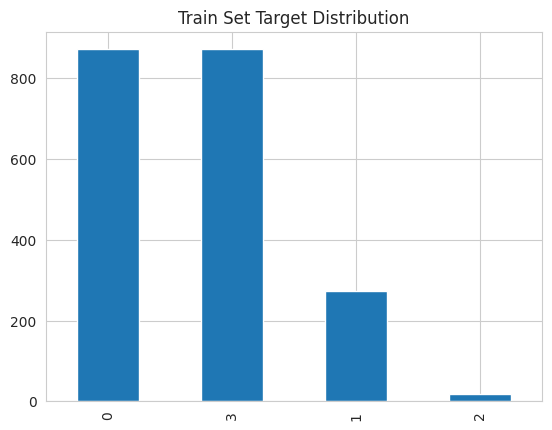

In [313]:
y_train.value_counts().plot(kind='bar',title='Train Set Target Distribution')
plt.show()

## Grid Search CV: Using the model from the last section/ best hyperparameter configuration

In [314]:
models_search

{'RandomForestClassifier': RandomForestClassifier(random_state=0)}

In [315]:
best_parameters

{'model__bootstrap': True,
 'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 10,
 'model__n_estimators': 200}

In [316]:
params_search = {'RandomForestClassifier':  {
    'model__bootstrap': [True],
    'model__max_depth': [None],
    'model__min_samples_leaf': [1],
    'model__min_samples_split': [10],
    'model__n_estimators': [200]}
}
params_search

{'RandomForestClassifier': {'model__bootstrap': [True],
  'model__max_depth': [None],
  'model__min_samples_leaf': [1],
  'model__min_samples_split': [10],
  'model__n_estimators': [200]}}

#### Hyperparameter optimisation search

In [317]:
# Check unique values in y_train and y_test

print("Unique labels in y_train:", set(y_train))
print("Unique labels in y_test:", set(y_test))

# Find labels in y_test that are not in y_train
unseen_labels = set(y_test) - set(y_train)
print("Unseen labels in y_test:", unseen_labels)

Unique labels in y_train: {'3', '1', '2', '0'}
Unique labels in y_test: {0, 1, 2, 3}
Unseen labels in y_test: {0, 1, 2, 3}


In [318]:
# Recode values in y_train as integer format
y_train = y_train.astype(int)

In [319]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

### GridSearch CV with SMOTE transformation

In [320]:
from sklearn.metrics import recall_score, make_scorer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE to handle class imbalance in y_train
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the model with weighted recall scoring
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train_resampled, y_train_resampled,
           scoring=make_scorer(recall_score, average='weighted'),
           n_jobs=-1, cv=5)

# Check the grid search summary
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
print(grid_search_summary)

# Check predicted classes
model = models_search['RandomForestClassifier']
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("Predicted classes:", np.unique(y_pred))


Running GridSearchCV for RandomForestClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
                estimator min_score mean_score max_score std_score  \
0  RandomForestClassifier  0.956958   0.963302  0.967001  0.003703   

  model__bootstrap model__max_depth model__min_samples_leaf  \
0             True             None                       1   

  model__min_samples_split model__n_estimators  
0                       10                 200  
Predicted classes: [0 1 2 3]


In [321]:
# Define best clf pipeline

best_model = grid_search_summary.iloc[0, 0]
best_model_key = grid_search_summary.iloc[0]['estimator']
pipeline_clf = grid_search_pipelines[best_model_key].best_estimator_
pipeline_clf

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(min_samples_split=10, n_estimators=200,
                                        random_state=0))])

### Assessing feature importance for revised model

* These are the 5 most important features in descending order. The model was trained on them: 
['GrLivArea', 'TotalBsmtSF', 'LotFrontage', 'YearBuilt', 'LotArea']


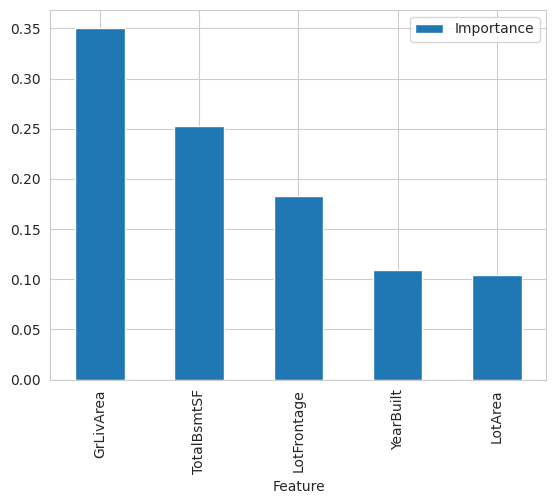

In [322]:
best_features = X_train_resampled.columns

# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    'Feature': best_features,
    'Importance': pipeline_clf['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)


# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

---

In [327]:
# Save as png in images folder

import os
try:
  os.makedirs(name='outputs/images')
except Exception as e:
  print(e)

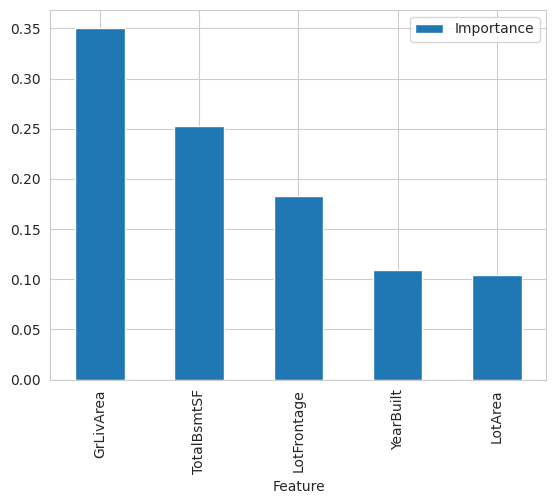

In [328]:
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.savefig(f'/workspace/milestone-project-housing-issues/outputs/images/features_importance.png', bbox_inches='tight')

---